**[Source : Saudi Arabia Used Cars](https://drive.google.com/file/d/1Tr4YT5dmgwTrXLvIqZ4diBf5z8K6JjrR/view)*

### **Contents**

1. Business Problem
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## Business Problem Understanding

1. **Business Problem**

    Pasar mobil bekas di Arab Saudi memiliki karakteristik unik, dengan beragam merek, tipe, dan kondisi mobil yang tersedia. Konsumen sering kali kesulitan menentukan harga yang wajar untuk sebuah mobil bekas karena berbagai faktor yang memengaruhi harga, seperti tahun produksi, jarak tempuh, ukuran mesin, dan fitur tambahan.

    Studi sebelumnya menunjukkan bahwa transparansi harga dapat meningkatkan kepercayaan pembeli di pasar mobil bekas (Smith et al., 2020). Oleh karena itu, analisis harga yang akurat menjadi kunci untuk meningkatkan efisiensi pasar.

2. **Problem Statement**

    Salah satu tantangan utama dalam industri mobil bekas adalah mengestimasi harga mobil bekas untuk pembeli atau penjual yang ingin mengikuti tren pasar sehingga mendapatkan harga yang terbaik. Penentuan harga mobil bekas berdasarkan merek, jenis mesin, tahun pembuatan, faktor lainnya yang membutuhkan keahlian profesional yang memahami kondisi mobil dan skema harga yang sesuai berdasarkan pengalaman sebelumnya.

    Model tersebut akan memberikan kemudahan bagi pembeli dengan memberikan informasi tentang kualitas mobil, baik itu dalam kondisi yang sangat baik, baik, atau buruk. Dan dapat membantu para pelaku bisnis mobil bekas dalam menentukan harga jual berdasarkan data pasar sehingga mendapatkan harga yang terbaik.

3. **Goal**

    Dalam menghadapi tantang tersebut, mobil bekas memerlukan faktor-faktor lain untuk prediksi harga mobil bekas yang dapat diandalkan bagi pengguna yang ingin membeli maupun menjual mobil berdasarkan rincian seperti model mobil dan jarak tempuh. Sehingga seseorang dapat memberikan perkiraan harga yang terbaik berdasarkan tren pasar dan sesuai dengan spesifikasi mobil untuk membantu pengguna mengatasi kesulitan dalam menentukan harga.

4. **Analytic Approach**

    Jadi yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada. Dan akan dilakukan membangun suatu model suatu regresi yang akan membantu pengguna untuk mendapatkan faktor prediksi harga mobil bekas yang bertujuan untuk menghindari harga mobil bekas yang *overprice* atau *underprice* (harga terbaik)

5. **Metrics Evaluation**

    Evaluasi matriks yang akan digunakan adalah MAE, dan MAPE, dimana MAE adalah rata-rata nilai absolut dari error, sedangkan MAPE adalah rata-rata persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai dari evaluasi matriks yang digunakan berarti model yang digunakan semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan.

    Selain itu kita juga dapat menggunakan R-Squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-Squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi.**Context**


### **Data Understanding**

| **Attribute**      | **Data Type, Length**               | **Description**                                                             |
|---------------------|--------------------------------------|-----------------------------------------------------------------------------|
| **Type**           | Text                                | Nama jenis mobil (contoh: Corolla, Yukon).                                  |
| **Region**         | Text                                | Nama wilayah tempat mobil dijual (contoh: Riyadh, Abha).                    |
| **Make**           | Text                                | Merek mobil (contoh: Toyota, GMC).                                         |
| **Gear_Type**      | Text                                | Jenis transmisi mobil (contoh: Manual, Automatic).                         |
| **Origin**         | Text                                | Asal mobil (contoh: Saudi, Gulf Arabic).                                   |
| **Options**        | Text                                | Level fitur pada mobil (Standard, Semi Full, Full).                        |
| **Year**           | Int (4 digit)                       | Tahun produksi mobil.                                                      |
| **Engine_Size**    | Float                               | Ukuran mesin mobil dalam liter (contoh: 2.0, 3.5).                         |
| **Mileage**        | Float                               | Jarak tempuh mobil dalam kilometer.                                        |
| **Negotiable**     | Boolean                             | Harga mobil bisa dinegosiasikan atau tidak (True/False).                   |
| **Price**          | Float                               | Harga mobil dalam satuan moneter (target variabel).                        |


In [1]:
# Import library untuk mengeksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk mengabaikan warnings
import warnings
warnings.filterwarnings('ignore')


# Untuk mengubah notasi ilmiah menjadi format desimal
pd.options.display.float_format = '{:.1f}'.format

### Read the dataset

In [2]:
# Read dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [3]:
# Check datatype for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


**Deskripsi Varibel**

*   **Tipe** : Jenis mobil bekas
*   **Region** : Wilayah tempat mobil bekas tersebut berada
*   **Make** : Nama perusahaan pembuat mobil bekas
*   **Gear_Type** : Jenis transmisi mobil bekas
*   **Origin** : Asal mobil bekas
*   **Options** : Pilihan-pilihan mobil bekas
*   **Year** : Tahun pembuatan mobil bekas
*   **Engine_Size** : Ukuran mesin mobil bekas
*   **Mileage** : Jarak tempuh mobil bekas
*   **Negotiable** : Status negosiasi mobil bekas
*   **Price** : Harga mobil bekas (dalam Riyal)

Seperti yang dapat kita lihat diatas, 11 kolom dalam dataset ini, diantaranya terdapat 10 fitur dan satu kolom target yaitu Harga. Tujuannya adalah untuk memprediksi harga mobil menggunakan kumpulan fitur ini.












### **Data Preprocessing**

Dataset yang digunakan membutuhkan tahapan Preprocessing yang bertujuan untuk mendapatkan data yang sudah bersih yang akan dilakukan analisa lebih lanjut. Adapun beberapa hal yang perlu dilakukan adalah :

*   Drop missing value jika ada
*   Drop data duplikat jika ada
*   Drop fitur yang tidak relevansi terhadap permasalahan yang dihadapi
*   Mengubah tipe data yang belum sesuai





### Periksa detail dataset

In [4]:
# Membuat duplikasi dataframe
cars = df.copy()

In [5]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[Coupe, L300]"
1,Region,object,0,0.0,27,"[Arar, Al-Jouf]"
2,Make,object,0,0.0,58,"[Iveco, Lincoln]"
3,Gear_Type,object,0,0.0,2,"[Automatic, Manual]"
4,Origin,object,0,0.0,4,"[Saudi, Gulf Arabic]"
5,Options,object,0,0.0,3,"[Semi Full, Standard]"
6,Year,int64,0,0.0,50,"[2015, 2005]"
7,Engine_Size,float64,0,0.0,71,"[2.4, 8.8]"
8,Mileage,int64,0,0.0,1716,"[383000, 45370]"
9,Negotiable,bool,0,0.0,2,"[False, True]"


Table diatas menunjukkan bahwa dataset yang digunakan tidak memiliki missing value, namun apabila melihat 'unique' value pada feature `Origin` terdapat value `unknown`. Proses selanjutnya kita perlu mengobservasi terlebih dahulu untuk dapat menentukan langkah untuk mengatasinya

#### Handling Missing Value

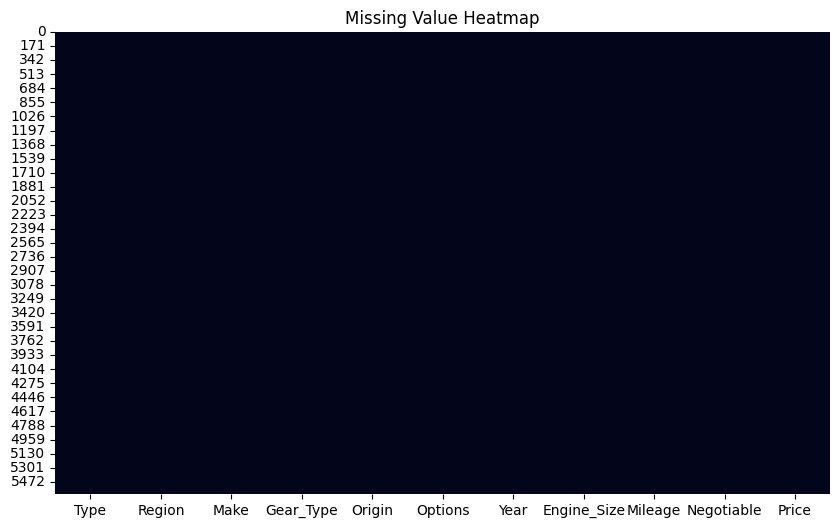

In [6]:
# Membuat missing value heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cars.isnull(), cbar=False)
plt.title('Missing Value Heatmap')
plt.show()

Dari informasi dataset di atas, dapat terlihat bahwa tidak ada missing value dalam dataset. Namun, kita tetap harus memperhatikan dalam mengambil keputusan terbaik untuk model.

Kita juga harus memeriksa adanya data duplikat dalam dataset. Duplikat berarti kita memiliki data yang berulang dalam dataset. Hal ini bisa disebabkan oleh kesalahan penginputan data atau metode pengumpulan data. Menghapus data duplikat akan membantu kita membuat observasi yang terbaik dari dataset yang kita miliki.

In [7]:
#filter kolom origin yang unknown
cars[cars.Origin == 'Unknown']

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
63,Land Cruiser Pickup,Qassim,Nissan,Manual,Unknown,Full,2016,4.8,42000,True,0
133,Land Cruiser,Riyadh,Toyota,Automatic,Unknown,Full,2014,4.6,191000,True,0
252,CX9,Abha,Mazda,Automatic,Unknown,Full,2012,2.5,377836,True,0
253,Sorento,Jubail,Kia,Automatic,Unknown,Semi Full,2015,3.3,133981,True,0
276,Charger,Riyadh,Dodge,Automatic,Unknown,Full,2020,3.6,9120,False,115000
...,...,...,...,...,...,...,...,...,...,...,...
5350,Sonata,Al-Ahsa,Hyundai,Automatic,Unknown,Semi Full,2016,2.4,258000,False,38000
5413,Camry,Riyadh,Toyota,Automatic,Unknown,Standard,2016,2.5,254000,True,0
5449,Land Cruiser,Tabouk,Toyota,Manual,Unknown,Full,1995,4.6,300000,False,20000
5481,Elantra,Al-Jouf,Hyundai,Automatic,Unknown,Standard,2016,2.0,120000,True,0


In [8]:
# cek nilai unik dari kolom 'Origin'
cars['Origin'].unique()

array(['Saudi', 'Gulf Arabic', 'Other', 'Unknown'], dtype=object)

In [9]:
# cek value unknown dari kolom 'Origin'
cars[cars.Origin == 'Unknown'].count()

,0
Type,61
Region,61
Make,61
Gear_Type,61
Origin,61
Options,61
Year,61
Engine_Size,61
Mileage,61
Negotiable,61


In [10]:
# inconsistent data ( 'Unknown' = NaN)
cars.replace(to_replace='Unknown', value='Other')

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


In [11]:
# remove all column with at least one missing value
cars = cars.dropna(axis=0)
cars

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


In [12]:
# Get number of missing data
cars.isnull().sum()

,0
Type,0
Region,0
Make,0
Gear_Type,0
Origin,0
Options,0
Year,0
Engine_Size,0
Mileage,0
Negotiable,0


#### Dropping irrelevant columns

In [13]:
# 'Negotiable' column is not necessary for analysis, so I will delete it
cars.drop('Negotiable', axis=1, inplace=True)
cars.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,0


In [14]:
# Check Statistics Desc for numerical features
cars.describe()

,Year,Engine_Size,Mileage,Price
count,5624.0,5624.0,5624.0,5624.0
mean,2014.1,3.3,150923.4,53074.1
std,5.8,1.5,382836.0,70155.3
min,1963.0,1.0,100.0,0.0
25%,2012.0,2.0,38000.0,0.0
50%,2016.0,3.0,103000.0,36500.0
75%,2018.0,4.5,196000.0,72932.5
max,2022.0,9.0,20000000.0,850000.0


- Apabila kita melihat pada column `Price` terlihat 25% data `Price` memiliki nilai 0, yang dimana tidak mungkin harga jual mobil secara gratis
- Mileage atau jarak tempuh dalam satuan mile memiliki nilai maximum sebesar 20,000,000 atau setara 32.186.880 km apabila dibandingkan jarak tersebut melebihi jarak antara bumi ke bulan atau dapat dikatakan tidak mungkin

**Data Correlation**

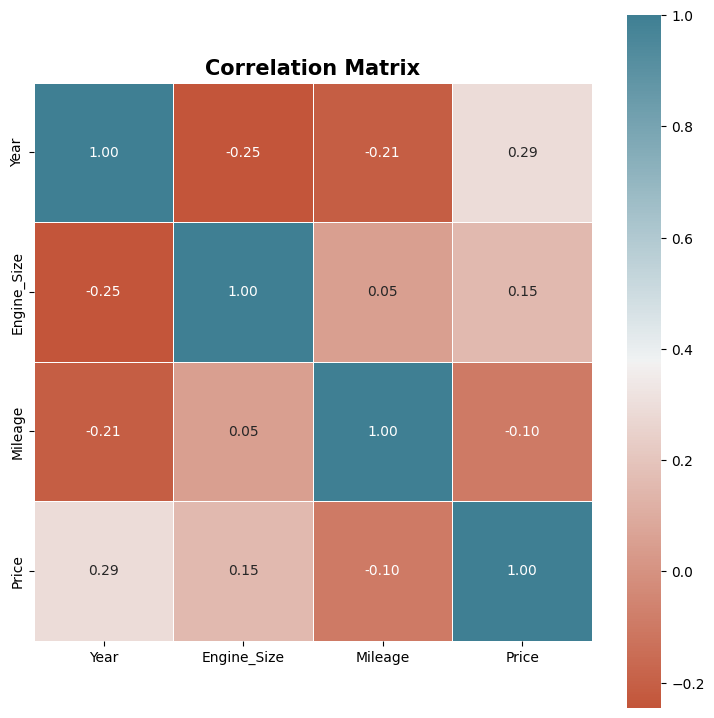

In [15]:
# Correlation matrix
# Mengambil numerik saja
cars_numerik = cars.select_dtypes(include=np.number)

plt.figure(figsize=(9, 9))
palette=sns.diverging_palette(20, 220, n=256)
corr = cars_numerik.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Berdasarkan matriks korelasi, kita dapat menyimpulkan bahwa tidak ada fitur yang memiliki korelasi yang signifikan dengan fitur Price. Korelasi tertinggi terjadi antara fitur Year dengan Price. Secara umum, nilai korelasi cenderung positif, namun pada fitur Mileage, korelasinya memiliki arah yang berlawanan.

**Outliers**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

<Axes: ylabel='Price'>

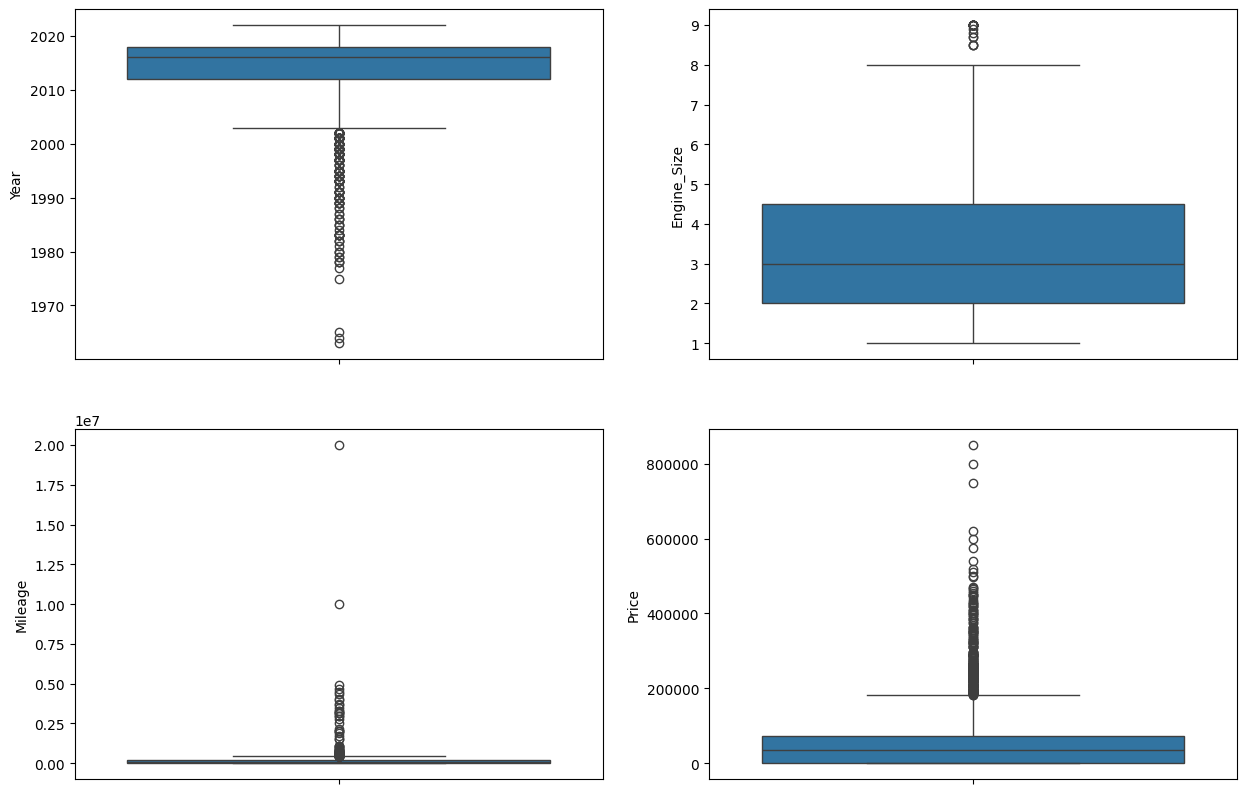

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(cars['Year'])
plt.subplot(2,2,2)
sns.boxplot(cars['Engine_Size'])
plt.subplot(2,2,3)
sns.boxplot(cars['Mileage'])
plt.subplot(2,2,4)
sns.boxplot(cars['Price'])


Terdapat beberapa nilai outlier pada kolom Year, Engine_Size dan Price tetapi data tersebut akan tetap kita gunakan, karena bukan merupakan nilai ekstrim.

Kita akan berfokus pada nilai outlier yang ada pada kolom Mileage. Nilai outlier pada Mileage yang paling eksrim yang terlihat pada boxplot yaitu ada 2 data. Nilai Mileage sendiri merupakan jarak yang telah ditempuh mobil tersebut, rata-rata pertahun nilai Milage adalah 16.000 (https://ksa.motory.com). Kedepannya kita akan menghapus nilai outlier pada kolom mileage.

Dapat dilihat pada boxplot Price nilai minimal dan q1 berada pada nilai 0. Kedepannya untuk memudahkan analisa dan modeling, data yang memiliki nilai Price nol akan dihapus. Nilai nol pada Price berhubungan dengan nilai boolean yang terdapat pada kolom Negotiable, dimana jika True maka nilai Price adalah nol, jika kita menggunakan data dengan nilai Price bukan nol maka hanya akan muncul 1 nilai pada kolom Negotiable, oleh karena itu kedepannya kolom ini akan dihapus.

In [17]:
# Finding outliers index
q1 = cars['Mileage'].describe()['25%']
q3 = cars['Mileage'].describe()['75%']
iqr = q3 - q1

outlier_index = cars[(cars['Mileage'] < q1 - (1.5 * iqr)) | (cars['Mileage']> q3 + (1.5 *iqr)) ].index

In [18]:
# Delete outliers in Mileage and zero value price data
before_cl = len(cars)
cars = cars.drop(index=outlier_index) # Use index= to specify the index to drop
cars = cars[cars['Price'] != 0]
after_cl = len(cars)
total_cl = before_cl - after_cl
print('Jumlah data yang terhapus adalah = {}'.format(total_cl))

Jumlah data yang terhapus adalah = 1879


Terdapat 33% data yang dihapus dari nilai Outlier Price yang memiliki value 0. Data tersebut dihapus karena tidak mungkin membeli atau menjual mobil bekas dikasih harga gratis pasti tetap memiliki harga walaupun kecil

#### Duplicate Data

Kita akan periksa apakah terdapat data duplikat, jika ada maka akan hapus data tersebut.

In [19]:
print("Number of duplicate rows: ", sum(cars.duplicated()))
cars.drop_duplicates(inplace=True)
print("Number of duplicate rows: ", sum(cars.duplicated()))

Number of duplicate rows:  3
Number of duplicate rows:  0


Terdapat 3 data duplikat yang ditemukan, berdasarkan fungsi diatas data tersebut telah terhapus

#### Check the Dataset

In [20]:
# Check data informations
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3742 entries, 1 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3742 non-null   object 
 1   Region       3742 non-null   object 
 2   Make         3742 non-null   object 
 3   Gear_Type    3742 non-null   object 
 4   Origin       3742 non-null   object 
 5   Options      3742 non-null   object 
 6   Year         3742 non-null   int64  
 7   Engine_Size  3742 non-null   float64
 8   Mileage      3742 non-null   int64  
 9   Price        3742 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 321.6+ KB


Terlihat bahwa data sebelumnya berjumlah 11 kolom dan 5624 baris menjadi 10 kolom 3742 baris. Berkurangnya data dalam jumlah besar ini dikarenakan dihapusnya data dengan nilai Price = 0

***Price***

In [21]:
cars.describe()

,Year,Engine_Size,Mileage,Price
count,3742.0,3742.0,3742.0,3742.0
mean,2015.0,3.2,120556.9,78887.4
std,4.9,1.5,96777.2,72888.9
min,1963.0,1.0,100.0,1.0
25%,2014.0,2.0,47000.0,36000.0
50%,2016.0,2.7,100000.0,58000.0
75%,2018.0,4.0,176207.8,95000.0
max,2021.0,9.0,433000.0,850000.0


In [22]:
cars.sort_values(by='Price')[:5]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,950


Text(0.5, 0, 'Range Selected Price')

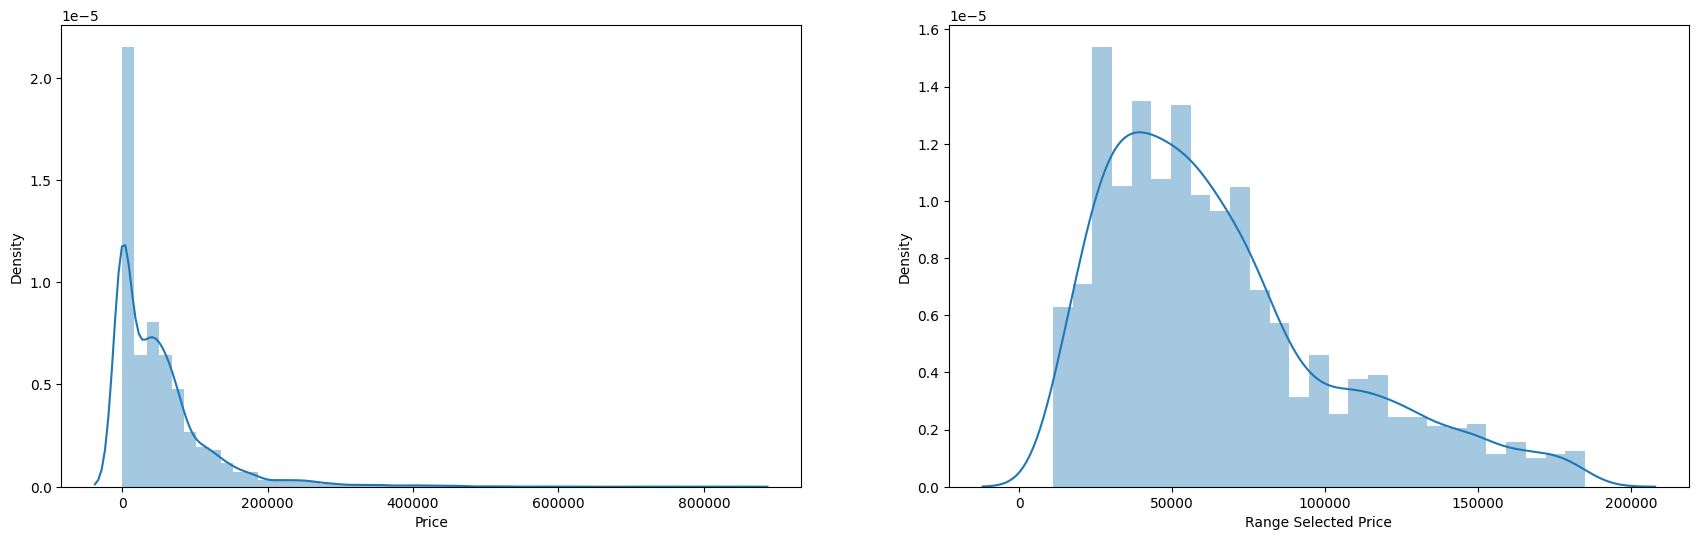

In [23]:
# Melakukan filtering pada data
cars = cars[(cars['Price'] > 10000) & (cars['Price'] <= 185000)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Price'], ax=axes[0])
sns.distplot(cars['Price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price')

In [24]:
cars['Price'].describe()

,Price
count,3377.0
mean,65820.0
std,38832.7
min,11000.0
25%,36500.0
50%,57000.0
75%,85000.0
max,185000.0


In [25]:
# Cek price > 182331.25
cars[cars['Price'] > 182331.25].count()['Price']

8

In [26]:
# Cek price > 10000
cars[cars['Price'] < 10000].count()['Price']

0

- Kita dapat melihat bahwa harga untuk sebuah mobil tidak terlihat normal
- Dengan demikian untuk mengurangi 'skew the results' kita akan melakukan drop dengan limitasi

                            10000 Riyal > Price <= 185000 Riyal

<Axes: xlabel='Price', ylabel='Density'>

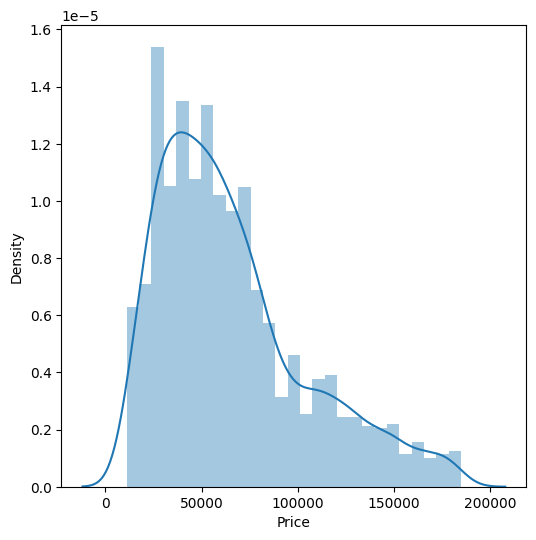

In [27]:
plt.figure(figsize=(6,6))
sns.distplot(cars['Price'])

***Mileage***

In [28]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

In [29]:
# Outliers pada fitur Mileage
find_anomalies(cars['Mileage'])

IQR: 128000.0
limit_bawah: -138000.0
limit_atas: 374000.0


In [30]:
cars['Mileage'].describe()

,Mileage
count,3377.0
mean,125548.0
std,96436.5
min,100.0
25%,54000.0
50%,106000.0
75%,182000.0
max,433000.0


Text(0.5, 0, 'Range Selected Mileage')

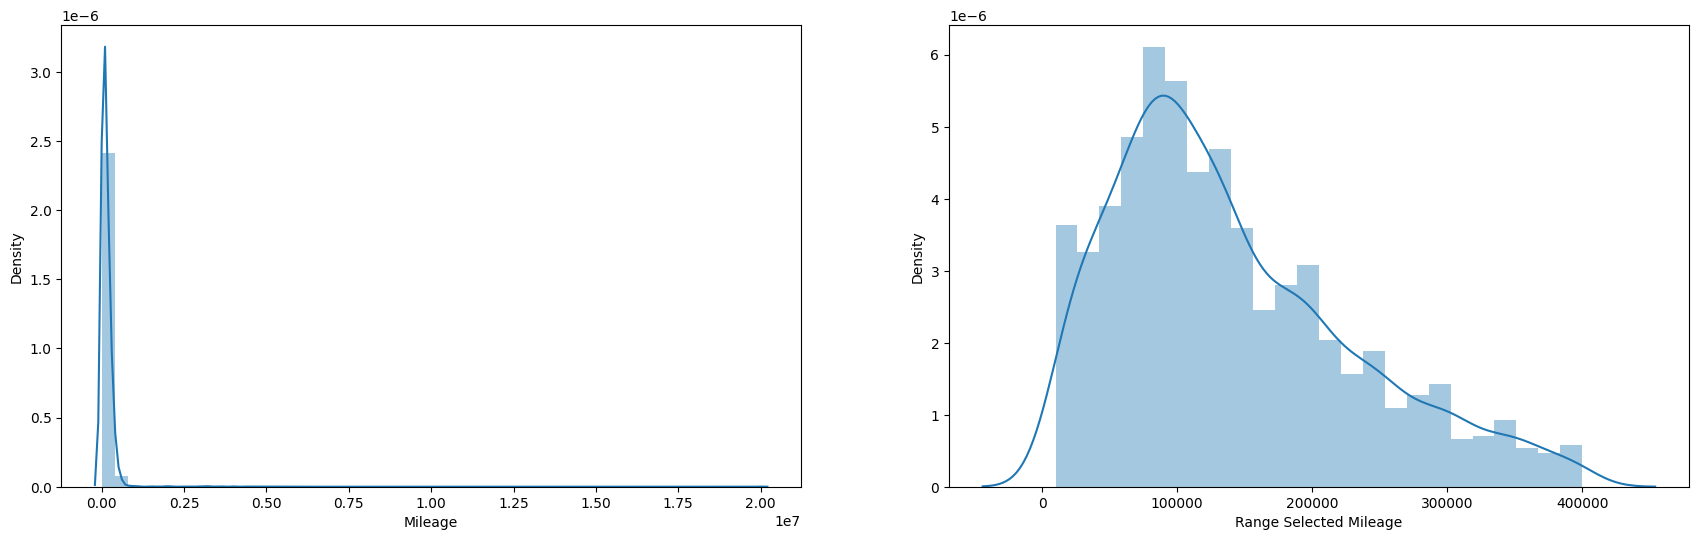

In [31]:
# Melakukan filtering pada data
cars = cars[(cars['Mileage'] >= 10000) & (cars['Mileage'] <= 400000)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Mileage'], ax=axes[0])
sns.distplot(cars['Mileage'], ax=axes[1])
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Range Selected Mileage')

In [32]:
# Cek Mileage > 392500.0
cars[cars['Mileage'] > 400000.0].count()['Mileage']

0

In [33]:
# Cek Mileage < 10000.0
cars[cars['Mileage'] < 10000.0].count()['Mileage']

0

- Berdasarkan beberapa `used car website` mobil yang dijual memiliki range mileage dengan kisaran 10000 - 400000
- Hal tersebut untuk membuat mileage terlihat lebih real

***Year***

In [34]:
cars['Year'].describe()

,Year
count,2982.0
mean,2015.1
std,4.4
min,1964.0
25%,2014.0
50%,2016.0
75%,2018.0
max,2021.0


In [35]:
find_anomalies(cars['Year'])

IQR: 4.0
limit_bawah: 2008.0
limit_atas: 2024.0


Text(0.5, 0, 'Range Selected Year')

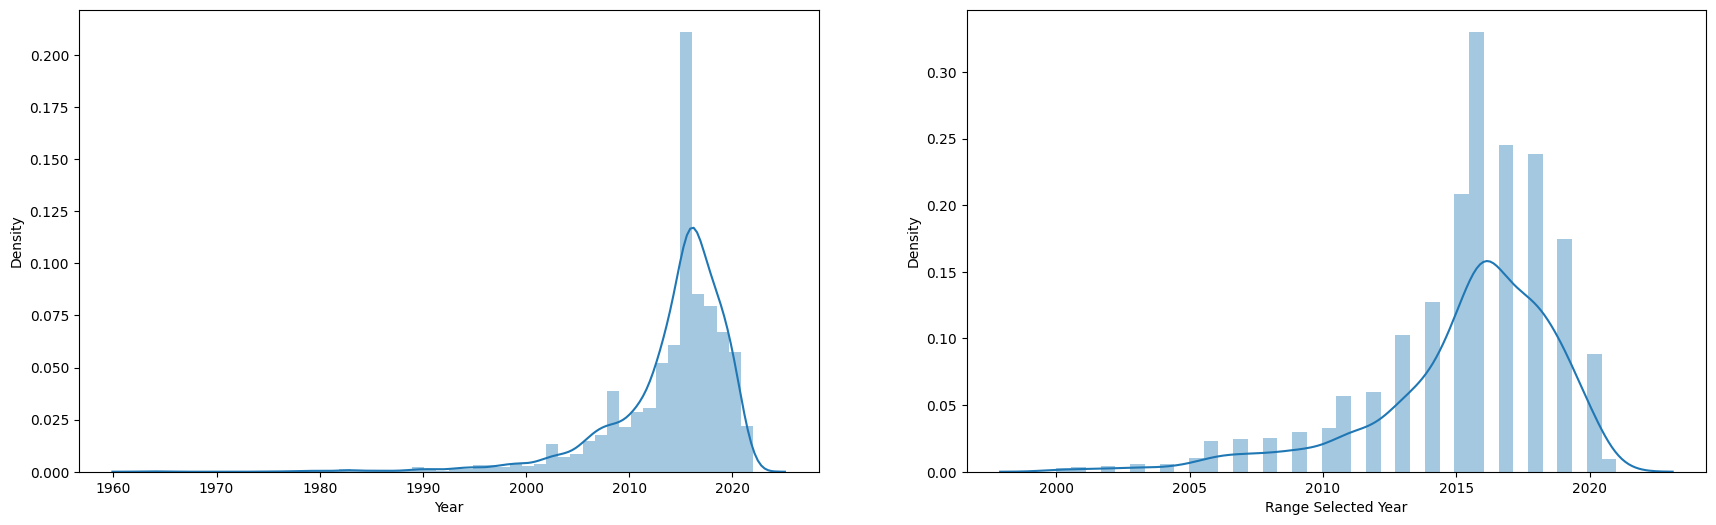

In [36]:
# Melakukan filtering pada data
cars = cars[(cars['Year'] >= 2000) & (cars['Year'] <= 2021)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Year'], ax=axes[0])
sns.distplot(cars['Year'], ax=axes[1])
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Range Selected Year')

Sebelum memulai proses pemodelan, penting untuk memastikan bahwa data yang digunakan sudah bersih. Langkah selanjutnya adalah memilih metode yang diharapkan dapat meningkatkan kinerja model machine learning yang akan dibangun. Perlu diingat bahwa *Garbage in, garbage out*, yang berarti hasil yang diperoleh dari model akan bergantung pada kualitas data yang digunakan sebagai masukan.

In [37]:
# Asumsi penjualan mobil bekas biasa, tidak ada classic car
cars[cars['Year'] < 2000].count()['Year']

0

In [38]:
cars[cars['Year'] > 2021].count()['Year']

0

- Jika kita melihat nilai maksimum, terlihat bahwa tahunnya adalah 2021, namun terdapat anomali dengan tahun 2024.
- Mengingat peraturan pemerintah Saudi Arabia, mobil bekas yang diperbolehkan adalah yang berusia kurang dari 7 tahun, namun hal ini dapat mengakibatkan kehilangan banyak data.
- Selain itu, kita berasumsi bahwa mobil yang dijual adalah mobil biasa, bukan mobil klasik.
- Dengan mempertimbangkan ketiga hal tersebut, kita membatasi tahun mobil dengan rentang 2000 hingga 2021.

In [39]:
cars.describe()

,Year,Engine_Size,Mileage,Price
count,2949.0,2949.0,2949.0,2949.0
mean,2015.4,3.1,139367.9,66988.8
std,3.5,1.4,88780.2,38414.6
min,2000.0,1.0,10000.0,11000.0
25%,2014.0,2.0,74000.0,38000.0
50%,2016.0,2.7,120000.0,58000.0
75%,2018.0,3.8,192000.0,85000.0
max,2021.0,9.0,400000.0,185000.0


In [40]:
cars.shape

(2949, 10)

Proses Feature Engineering telah mengeliminasi sebanyak 50% data sesuai dengan asumsi dan argumen yang diberikan. Jadi tersisa 2949 baris data dan 10 column yang akan digunakan dalam membangun model

#### **Exploratory Data Analysis**

Exploratory data analysis digunakan untuk memeriksa data dan mendapatkan insight. Ini akan memberikan pemahaman dasar tentang data kita, distribusinya, nilai null, dan banyak lagi. Jadi, kita akan melakukan Exploratory Data Analysis (EDA) pada data untuk pemahaman yang lebih baik.

Seperti yang telah disebutkan sebelumnya, kolom `Price` adalah variabel target dan kolom-kolom lainnya adalah variabel independen. Variabel independen ini kemudian dibagi lagi menjadi variabel Kategorikal dan Numerikal.

Berikut ini kita pisahkan masing-masing tipe variabel itu sendiri:

- **Numerical Variabels** : Year, Engine_Size, Mileage, Price
- **Categorical Variabels** : Type, Region, Make, Gear_Type, Origin, Options, Negotiable

**Numerical Variabels**

Untuk Numerical Variabels, kita dapat memperoleh wawasan dan korelasi dengan menggunakan Pair Plot. Karena Pair Plot menampilkan grafik pasangan untuk semua variabel numerikal dalam daftar, dan kita dapat melihat korelasi antara variabel numerikal.

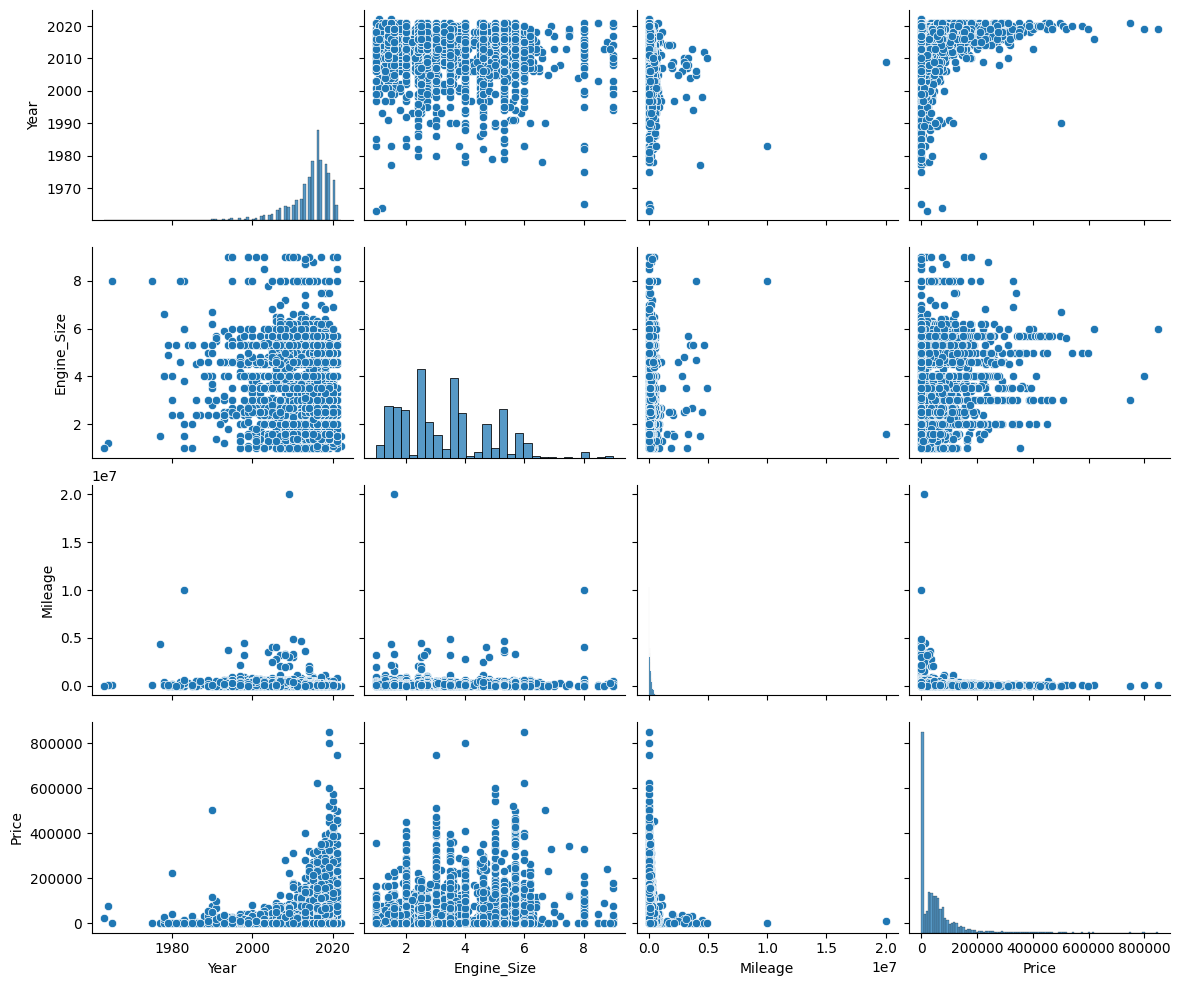

In [41]:
# Pairplot untuk semua variabel numerik
sns.pairplot(df[['Year','Engine_Size','Mileage','Price']], aspect=1.2)

**Insight** :

Seperti yang dapat kita lihat dari grafik Pairplot di atas, terdapat korelasi tinggi dan korelasi rendah antara variabel-variabel satu sama lain.
- **Year** : Engine_Size (Korelasi Rendah), Mileage (Korelasi Tinggi), Price (Korelasi Tinggi)
- **Engine_Size** : Year (Korelasi Rendah), Mileage (Korelasi Rendah), Price (Korelasi Rendah)
- **Mileage** : Year (Korelasi Tinggi), Engine_Size (Korelasi Rendah), Price (Korelasi Rendah)
- **Price** : Year (Korelasi Tinggi), Engine_Size (Korelasi Rendah), Mileage (LKorelasi Rendah)

**Categorical Variabels**

Untuk Variabel Kategorikal, kita akan menganalisis nilai pada setiap kategori untuk eksplorasi dan merangkum kategori itu sendiri. Kita akan membuat urutan peringkat dan menghitung nilainya, sehingga kita dapat melihat perusahaan mobil bekas mana yang paling banyak, tipe mobil bekas yang paling banyak, wilayah mana yang paling tinggi penggunaan mobil bekas, dari mana asal mobil bekas tersebut, dan sebagainya.

In [42]:
import plotly.graph_objects as go
import plotly.express as px

**1. Distribution of used car price**

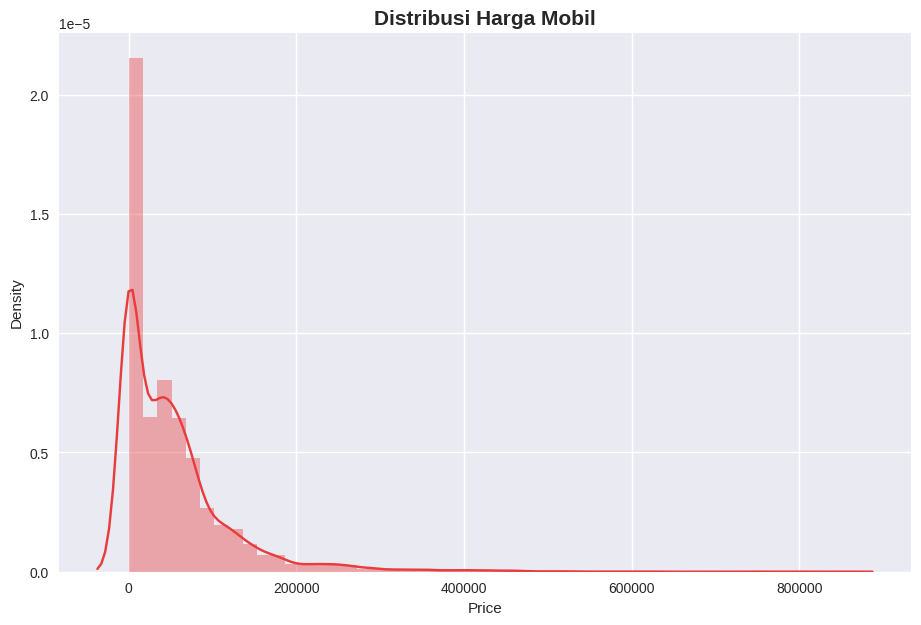

In [43]:
# Plot distribusi fitur 'price'
plt.style.use('seaborn-v0_8')  # Use a valid Seaborn-inspired style like 'seaborn-v0_8', 'seaborn-darkgrid', etc.
plt.figure(figsize = (11,7))
sns.distplot(df['Price'], color="#e83d3d")
plt.title('Distribusi Harga Mobil', size=15, weight='bold');

Gambar diatas menunjukkan bahwa `Price` dari used car memiliki `right-skewed distribution` atau dapat dikatakan positively skewed yang berarti nilai mean > median > mode

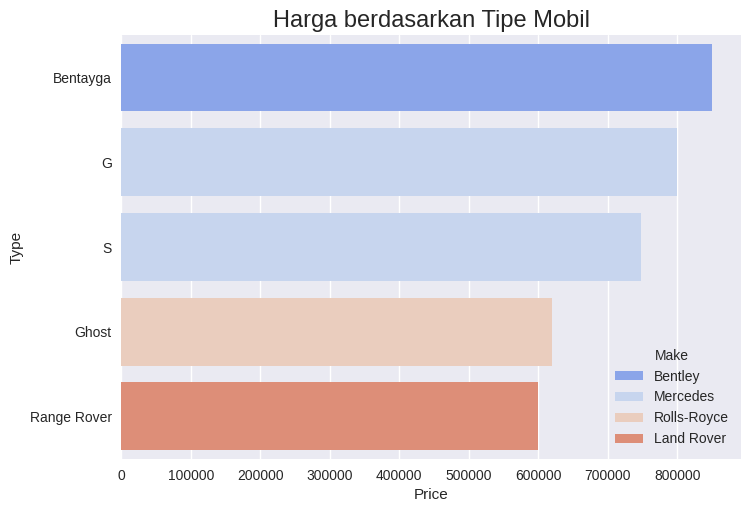

In [44]:
sns.barplot(
    x='Price',
    y='Type',
    hue='Make',
    data=df.nlargest(5, 'Price'),
    palette='coolwarm'
)
plt.title ('Harga berdasarkan Tipe Mobil', size = 17)
plt.show()

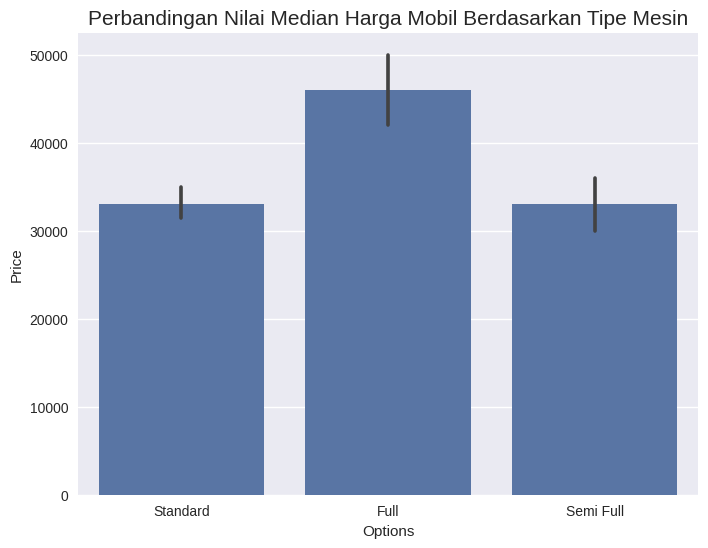

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(x='Options', y='Price', data=df, estimator=np.median)
plt.title('Perbandingan Nilai Median Harga Mobil Berdasarkan Tipe Mesin', size=15)
plt.show()

<Figure size 2500x800 with 0 Axes>

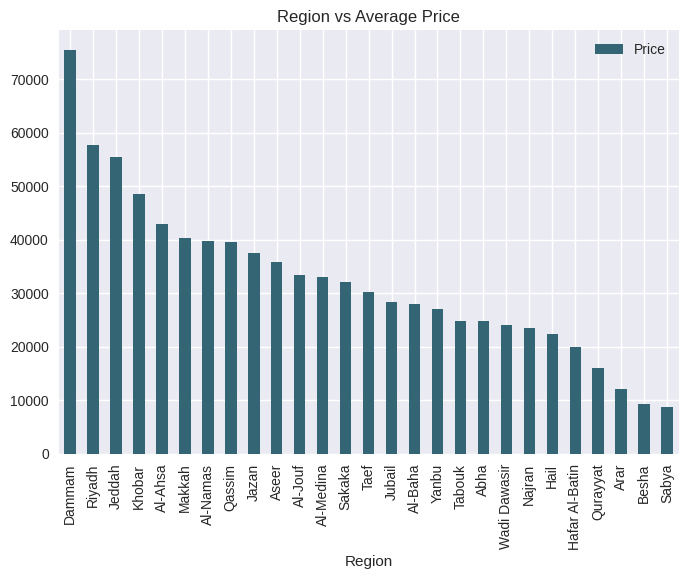

In [46]:
plt.figure(figsize=(25,8))

fig = pd.DataFrame(df.groupby(['Region'])['Price'].mean().sort_values(ascending = False))
fig.plot.bar(color='#336574')
plt.title('Region vs Average Price')
plt.show()

**Top 10 Company of Used Cars & Top 10 Type of Used Cars**

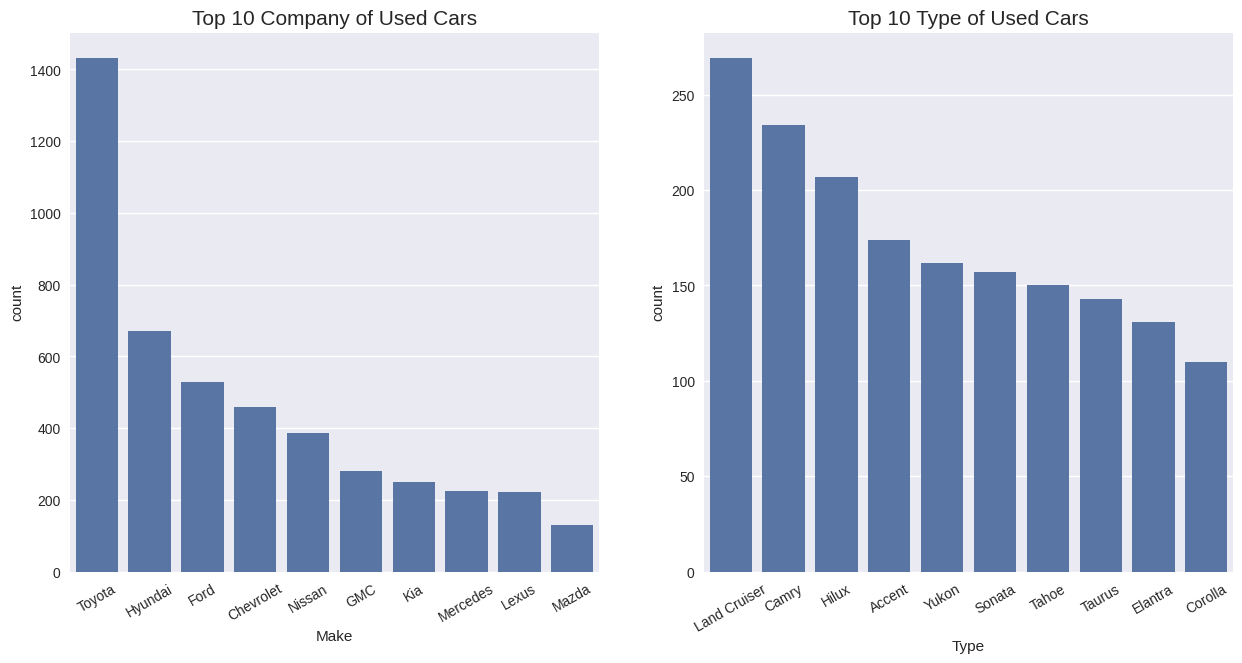

In [47]:
# Tampilkan 10 Perusahaan & Jenis mobil bekas teratas
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(x=df['Make'], order = df['Make'].value_counts().iloc[:10].index)
plt.title('Top 10 Company of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.subplot(1,2,2)
sns.countplot(x=df['Type'], order = df['Type'].value_counts().iloc[:10].index)
plt.title('Top 10 Type of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.show()

Grafik di atas menunjukkan bahwa Toyota merupakan produsen mobil bekas yang paling banyak dibandingkan dengan perusahaan lainnya. Ini berhubungan dengan 10 Tipe Mobil Bekas Teratas, mayoritas diisi dengan tipe mobil Toyota (Land Cruiser, Camry, Hilux, dan Corolla). Di sisi lain, Hyundai merupakan produsen mobil bekas kedua terbanyak dengan tipe-tipe seperti Accent, Sonata, dan Elantra. Jadi, berdasarkan grafik ini, kita dapat melihat adanya korelasi antara **Categorical Variable**; Merek dan Tipe.

**Top 10 Region of Used Cars & Origin of Used Cars**

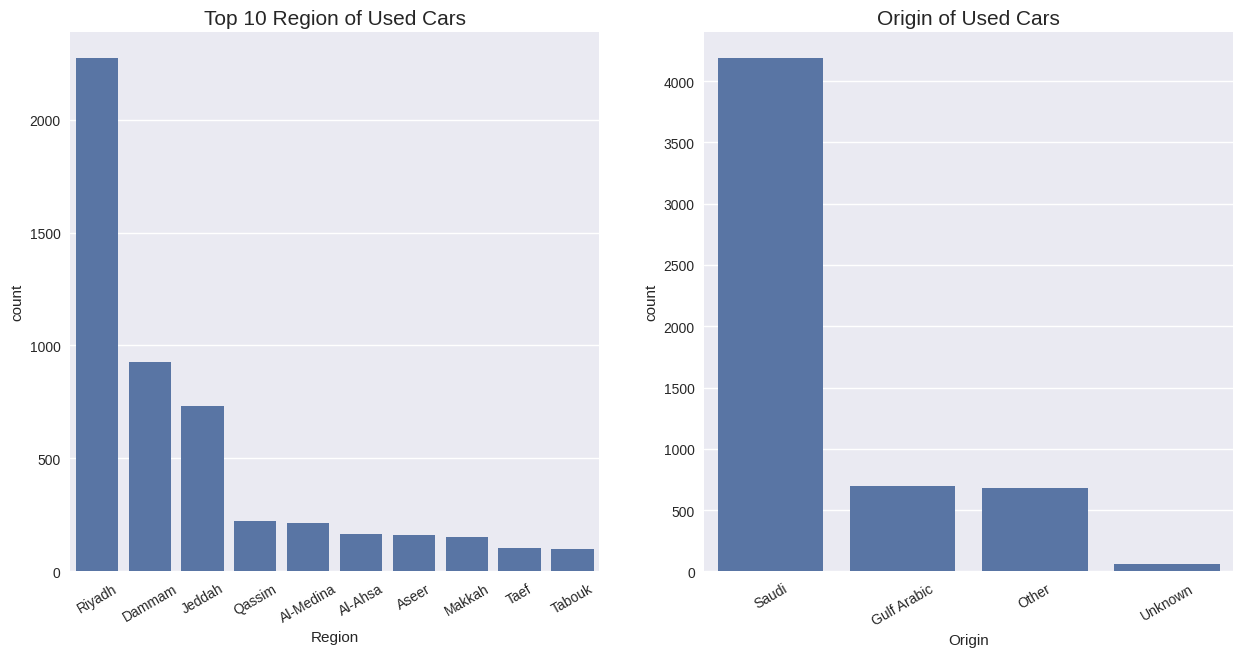

In [48]:
# Tampilkan 10 Perusahaan & Jenis mobil bekas teratas
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(x=df['Region'], order = df['Region'].value_counts().iloc[:10].index)
plt.title('Top 10 Region of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.subplot(1,2,2)
sns.countplot(x=df['Origin'], order = df['Origin'].value_counts().index)
plt.title('Origin of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.show()

Seperti yang dapat kita lihat, Riyadh adalah wilayah dengan jumlah mobil bekas terbanyak (lebih dari 2000 mobil), sementara Saudi adalah negara asal mobil bekas terbanyak (lebih dari 4000 mobil). Terlihat bahwa grafik ini memiliki korelasi satu sama lain. Namun, mari kita lihat dari sisi lain. Terdapat variabel `Unknown` dan `Other` dalam grafik Asal mobil bekas. Hal ini membuat data kita menjadi redudansi.

**Type & Amount of Gear Type, Options & Negotiable on Used Cars**

In [49]:
# Periksa type & amount of Gear Type, Options & Negotiable on Used Cars
print(f"Type & Amount of Gear Type on Used Cars :\n{df['Gear_Type'].value_counts()}")
print(f"\nType & Amount of Options on Used Cars :\n{df['Options'].value_counts()}")
print(f"\nType & Amount of Negotiable on Used Cars :\n{df['Negotiable'].value_counts()}")

Type & Amount of Gear Type on Used Cars :
Gear_Type
Automatic    4875
Manual        749
Name: count, dtype: int64

Type & Amount of Options on Used Cars :
Options
Full         2233
Standard     1822
Semi Full    1569
Name: count, dtype: int64

Type & Amount of Negotiable on Used Cars :
Negotiable
False    3828
True     1796
Name: count, dtype: int64


Berdasarkan data di atas, dapat diketahui bahwa:
- Mobil Bekas didominasi oleh Jenis Transmisi Otomatis.
- Terdapat tiga jenis Opsi pada Mobil Bekas, yaitu Full (2233), Standar (1822), dan Semi Full (1569).
- Banyak harga Mobil Bekas yang tidak dapat dinegosiasikan.

### **Feature Engineering**

Disini data yang telah bersih kemudian dilakukan feature Engineering (Data Encoding dan Scalling) agar kemudian dapat dimuat kedalam model regresi.

In [50]:
!pip install category_encoders

In [51]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.preprocessing import StandardScaler

In [52]:
cars.describe(include='all')

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
count,2949,2949,2949,2949,2949,2949,2949.0,2949.0,2949.0,2949.0
unique,269,27,49,2,4,3,NaN,NaN,NaN,NaN
top,Accent,Riyadh,Toyota,Automatic,Saudi,Standard,NaN,NaN,NaN,NaN
freq,138,1310,686,2680,2297,1123,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2015.4,3.1,139367.9,66988.8
std,NaN,NaN,NaN,NaN,NaN,NaN,3.5,1.4,88780.2,38414.6
min,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,1.0,10000.0,11000.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,2.0,74000.0,38000.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,2.7,120000.0,58000.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,3.8,192000.0,85000.0


Di dalam data terdapat beberapa fitur yang memiliki tipe data Object, agar dapat digunakan didalam modelling maka fitur-fitur tersebut akan kita ubah (encoding):

1. Fitur Type, Region, dan Make akan diubah dengan metode binary encoding, karena jumlah unique value yang banyak dan tidak memiliki urutan (ordinal)
2. Fitur Gear_Type, Origin dan Options akan diubah dengan metode one hot encoding, karena jumlah unique value yang sedikit dan tidak memiliki urutan
3. Fitur Mileage, Year, dan Engine Size akan digunakan metode standard scaler untuk menyamakan skala fitur dalam permodelan.

In [53]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
    ('Binary', ce.BinaryEncoder(), ['Type', 'Region', 'Make'])
], remainder='passthrough')

In [54]:
# Memisahkan data independen variabel dengan target
X = cars.drop(['Price'], axis=1)
y = cars['Price']

**Train and Test Splitting**

In [55]:
# Splitting data into training and test with propotion 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

### **Modeling**

In [56]:
!pip install scikit-learn==1.2.2

In [57]:
# Import library untuk modeling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Berdasarkan data yang tersedia, terdapat 6 variabel kategorikal. Jika kita ingin menggunakan seluruh fitur tersebut, kita perlu melakukan encoding. Pemilihan metode encoding dapat didasarkan pada skala pengukuran data, apakah nominal (numerik) atau ordinal (memiliki urutan tertentu saat diurutkan). Pada tahap ini, kita akan melakukan encoding sebagai berikut:

1. One-Hot Encoding: untuk variabel Gear_Type, Origin, dan Options.
2. Binary Encoding: untuk variabel Type, Region, dan Make.

Kita dapat menggunakan ColumnTransformer untuk mengubah tipe data variabel-variabel tersebut, sehingga nantinya dapat diaplikasikan dalam pipeline model.

**Choose a Benchmark Model**

In [58]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:

    crossval = KFold(n_splits=10, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # MAE
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        model_cv_mae = cross_val_score(
            estimator,
            X_train,
            y_train,
            cv=crossval,
            scoring='neg_mean_absolute_error',
            error_score='raise'
            )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        model_cv_mape = cross_val_score(
            estimator,
            X_train,
            y_train,
            cv=crossval,
            scoring='neg_mean_absolute_percentage_error',
            error_score='raise'
            )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-16527.38743904 -16043.63796713 -17227.28626973 -19228.99529225
 -17096.14441781 -19550.70341758 -18589.01503235 -13856.00768868
 -18409.24295672 -18149.16856282] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.26228894 -0.24924741 -0.2505266  -0.31103986 -0.29760779 -0.3165526
 -0.30518707 -0.24878545 -0.31324209 -0.29331957] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-16485.57787124 -15734.29642827 -18174.349436   -17783.92836125
 -17429.14395613 -17335.0436027  -17241.78821867 -14799.76079969
 -19584.28730253 -16551.88734326] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.28721659 -0.28584346 -0.35022732 -0.32521438 -0.40775176 -0.34083325
 -0.30653556 -0.29196851 -0.38558418 -0.28920984] TransformedTargetRegressor(f

In [59]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-17467.8,1618.7,-0.3,0.0
1,KNN Regressor,-17112.0,1257.4,-0.3,0.0
2,DecisionTree Regressor,-17117.4,1775.2,-0.3,0.0
3,RandomForest Regressor,-12567.6,1159.4,-0.2,0.0
4,XGBoost Regressor,-11849.8,1158.9,-0.2,0.0


- Dalam pemilihan kandidat model yang akan digunakan kita dapat melihat pada nilai MAE dan MAPE paling rendah
- Dengan demikian RandomForest Regressor dan XGBoost Regressor akan dilakukan benchmark  serta akan dilakukan prediksi menggunakan test set untuk kedua model tersebut

In [60]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,MAE,MAPE
XGB,11847.0,0.2
RandomForest,12923.6,0.3


Berdasarkan hasil uji terhadap data test diatas, didapatkan bahwa model **Xtreme Gradient Boosting** memiliki score matrix yang terbaik, maka model ini yang akan digunakan untuk prediksi harga mobil bekas.

**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [61]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate (Penyusutan ukuran langkah digunakan dalam pembaruan untuk mencegah overfitting)
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [62]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=42, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42
)

In [63]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(bas...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [64]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
26,0.4,0.1,0.0,0.0,0.4,1.3,100,7,0.1,1,...,487.0,1,-0.2,-0.2,-0.3,-0.2,-0.2,-0.2,0.0,2
8,0.4,0.0,0.0,0.0,0.4,0.0,166,5,0.2,2,...,374.6,5,-0.2,-0.2,-0.3,-0.2,-0.2,-0.2,0.0,5
9,0.3,0.0,0.0,0.0,0.9,0.1,105,5,0.4,3,...,878.8,2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,0.0,3
18,0.4,0.0,0.0,0.0,0.2,0.1,193,8,0.1,4,...,526.7,3,-0.2,-0.2,-0.3,-0.2,-0.2,-0.2,0.0,4
29,0.2,0.0,0.0,0.0,0.9,10.0,138,6,0.1,6,...,634.4,4,-0.2,-0.2,-0.3,-0.2,-0.2,-0.2,0.0,8


In [65]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -17975.096483673035
Best_params: {'model__subsample': 0.4, 'model__reg_alpha': 1.2915496650148828, 'model__n_estimators': 100, 'model__max_depth': 7, 'model__learning_rate': 0.06, 'model__gamma': 1, 'model__colsample_bytree': 0.7}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [67]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=42)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,MAPE
XGB,12401.0,0.2


In [68]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,MAE,MAPE
XGB,11847.0,0.2


Setelah dilakukannya hyperparameter tuning, terjadi penurunan nilai MAPE namun sebaliknya untuk nilai RMSE & MAE walaupun cenderung kecil.

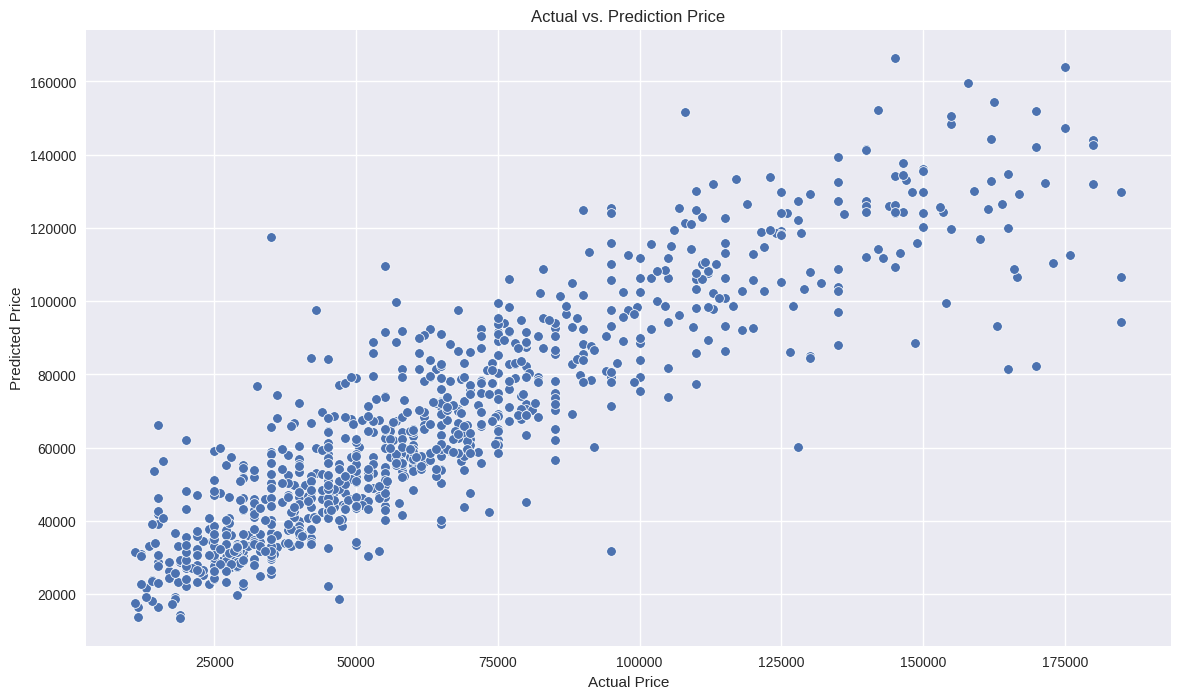

In [69]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price',
                                               xlabel='Actual Price',
                                               ylabel='Predicted Price');

Berdasarkan scatter plot menunjukkan bahwa hasil prediksi model tergolong baik. Nilai akhir dari evaluation metrix (MAPE) yang diperoleh sebesar 0.193763 atau 19%. Berdasarkan Gilliad, Michael(2010) menyatakan bahwa nilai MAPE 10%-19% tergolong "Good" atau dapat dikatakan acceptable level of forecast

Kemudian, pada hasil yang diperoleh menggambarkan adanya bias pada data. Hal ini dapat disebabkan oleh beberapa faktor, salah satunya multikolineritas atau terdapat hubungan yang kuat diantara independet variablenya. Untuk mencari penyebab dan mengatasinya akan dilakukan beberapa tahapan kembali hingga kita mendapatkan hasil model yang terbaik.

In [70]:
cars.describe()

,Year,Engine_Size,Mileage,Price
count,2949.0,2949.0,2949.0,2949.0
mean,2015.4,3.1,139367.9,66988.8
std,3.5,1.4,88780.2,38414.6
min,2000.0,1.0,10000.0,11000.0
25%,2014.0,2.0,74000.0,38000.0
50%,2016.0,2.7,120000.0,58000.0
75%,2018.0,3.8,192000.0,85000.0
max,2021.0,9.0,400000.0,185000.0


**Limitasi**

Limitasi pada model yang digunakan ditunjukkan pada nilai min dan max dari terget variable yaitu 'Price'. Model dapat digunakan dalam rentang 11000 hingga 185000 SAR

-------------------------------------------------------------------------------------------

**Feature Importances**

Untuk melakukan seleksi terhadap fitur-fitur yang memang penting atau berpengaruh terhadap target variabel

<Axes: title={'center': 'Feature Importances'}>

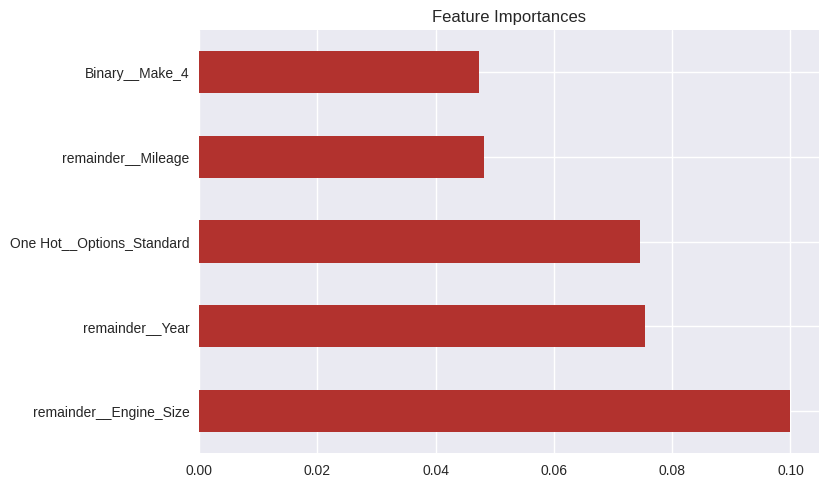

In [71]:
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending=False).head()
feature_imp.plot(kind='barh', title='Feature Importances', color='#b2322e')

In [75]:
name = []
importance = []
for nam,imp in zip(transformer.get_feature_names_out(), xgb_tuning['model'].feature_importances_): # Changed get_feature_names() to get_feature_names_out()
    name.append(nam)
    importance.append(round(imp*100,2))

In [76]:
feature = pd.DataFrame({'Features':name,'Importance(%)':importance})
feature.sort_values(by='Importance(%)',ascending=False)

,Features,Importance(%)
26,remainder__Engine_Size,10.0
25,remainder__Year,7.5
5,One Hot__Options_Standard,7.5
27,remainder__Mileage,4.8
23,Binary__Make_4,4.7
20,Binary__Make_1,4.5
19,Binary__Make_0,4.4
2,One Hot__Origin_Saudi,4.2
10,Binary__Type_4,3.8
8,Binary__Type_2,3.7


**Diagnostics and Collinearity**

In [77]:
# Import Library
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
X_preprocess = transformer.fit_transform(X)

In [79]:
X_preprocess

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0140e+03, 8.0000e+00,
        8.0000e+04],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0150e+03, 2.4000e+00,
        2.2000e+05],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0190e+03, 2.0000e+00,
        2.5000e+04],
       ...,
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0180e+03, 2.5000e+00,
        7.8794e+04],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0160e+03, 5.3000e+00,
        4.8000e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0160e+03, 2.5000e+00,
        8.1000e+04]])

In [80]:
X_preprocess.shape

(2949, 29)

In [81]:
transformer.transformers_

[('One Hot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
 ('Binary',
  BinaryEncoder(cols=['Type', 'Region', 'Make'],
                mapping=[{'col': 'Type',
                          'mapping':       Type_0  Type_1  Type_2  Type_3  Type_4  Type_5  Type_6  Type_7  Type_8
   1         0       0       0       0       0       0       0       0       1
   2         0       0       0       0       0       0       0       1       0
   3         0       0       0       0       0       0       0       1       1
   4         0       0       0       0       0       0       1       0       0
   5         0       0       0       0       0       0       1       0       1
  ...      ...     ...     ...     ...     ...     ...     ...     ...     ...
   267       1       0       0       0       0       1       0       1       1
   268       1       0       0       0       0       1       1       0       0
   269       1       0       0       0       0       1       1       0   

In [83]:
feature_corr = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names()) + ['Year','Engine_Size', 'Mileage']
# The get_feature_names() method of the BinaryEncoder returns a numpy array.
# Converting it to a list before concatenation with '+' ensures compatibility.
feature_corr

['Gear_Type_Manual',
 'Origin_Other',
 'Origin_Saudi',
 'Origin_Unknown',
 'Options_Semi Full',
 'Options_Standard',
 'Type_0',
 'Type_1',
 'Type_2',
 'Type_3',
 'Type_4',
 'Type_5',
 'Type_6',
 'Type_7',
 'Type_8',
 'Region_0',
 'Region_1',
 'Region_2',
 'Region_3',
 'Region_4',
 'Make_0',
 'Make_1',
 'Make_2',
 'Make_3',
 'Make_4',
 'Make_5',
 'Year',
 'Engine_Size',
 'Mileage']

In [84]:
df_feature = pd.DataFrame(data = X_preprocess, columns = feature_corr)
df_feature

,Gear_Type_Manual,Origin_Other,Origin_Saudi,Origin_Unknown,Options_Semi Full,Options_Standard,Type_0,Type_1,Type_2,Type_3,...,Region_4,Make_0,Make_1,Make_2,Make_3,Make_4,Make_5,Year,Engine_Size,Mileage
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2014.0,8.0,80000.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,2.4,220000.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2019.0,2.0,25000.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2012.0,4.8,189000.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2016.0,3.5,110864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2017.0,2.5,106000.0
2945,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,5.3,86000.0
2946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2018.0,2.5,78794.0
2947,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2016.0,5.3,48000.0


In [85]:
df_preprocess = pd.concat((df_feature, y), axis = 1)

**Assumption Summary**

In [86]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [87]:
y = list(y)

In [88]:
sm_lm = sm.OLS(y, sm.add_constant(df_feature))
result = sm_lm.fit()

In [89]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     121.9
Date:                Wed, 15 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:03:34   Log-Likelihood:                -34144.
No. Observations:                2949   AIC:                         6.835e+04
Df Residuals:                    2919   BIC:                         6.853e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.012e+07   3.79e+0

**Summary**
1. Adj. R-Square : 0.0543 --> Variasi nilai Price sebesar 54,3%, sisanya terdapat pada variable lain yang tidak dapat terdapat dalam model
2. Prob(F-Statistic) : 0.00 --> Tolak H0, terdapat minimal salah satu independent variable yang berpengaruh terhadap Price
3. Uji T Prob masing- masing beta
       - prob b0 :  0.000 (tolak H0) --> Model memerlukan intercept
       - prob Make_3 : 0.158 (terima H0) --> Make_3 tidak berpengaruh positif terhadap Price
       - prob Engine_Size : 0.000 (tolak H0) --> Engine_Size berpengaruh secara positif terhadap Price
       - prob Year :0.000 (tolak H0) --> Year berpengaruh secara positif terhadap Price
       - prob Options_Standard : 0.000 (tolak H0) --> Options_Standars berpengaruh secara negatif terhadap Price
       - prob Mileage : 0.000 (tolak H0) --> Mileage berpengaruh secara negatif terhadap Price

**Normality Assumption**

Text(0.5, 0, 'Residuals')

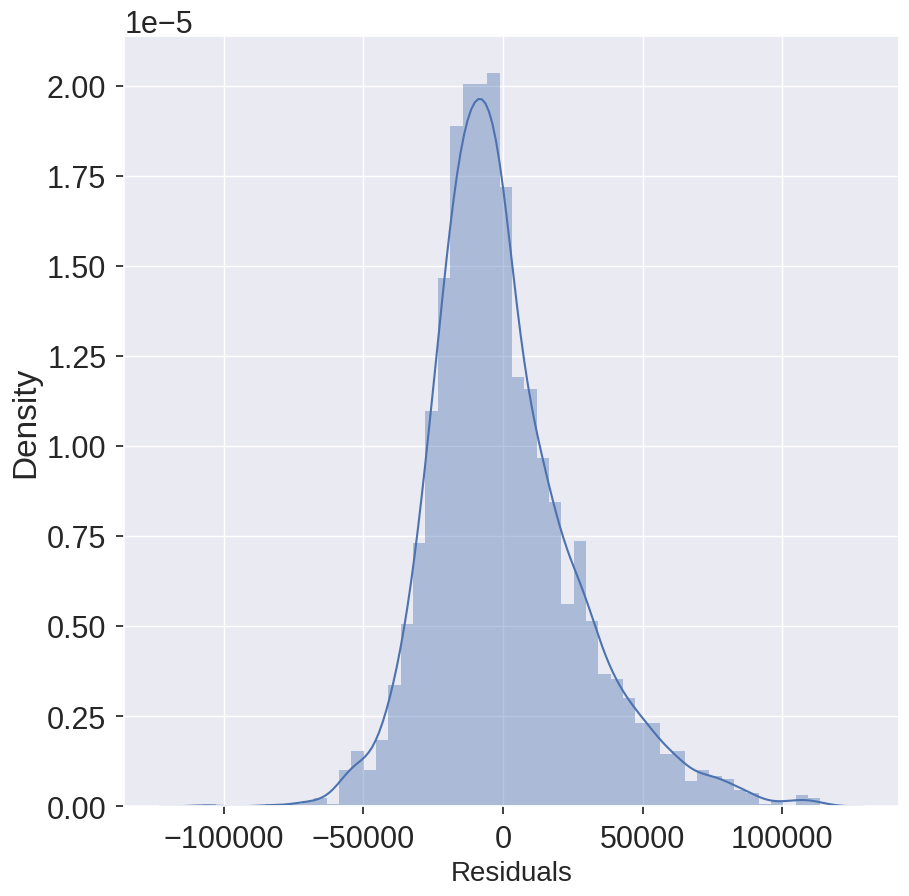

In [90]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20)

**Gauss-Markov Assumption**

Text(0, 0.5, 'Residuals')

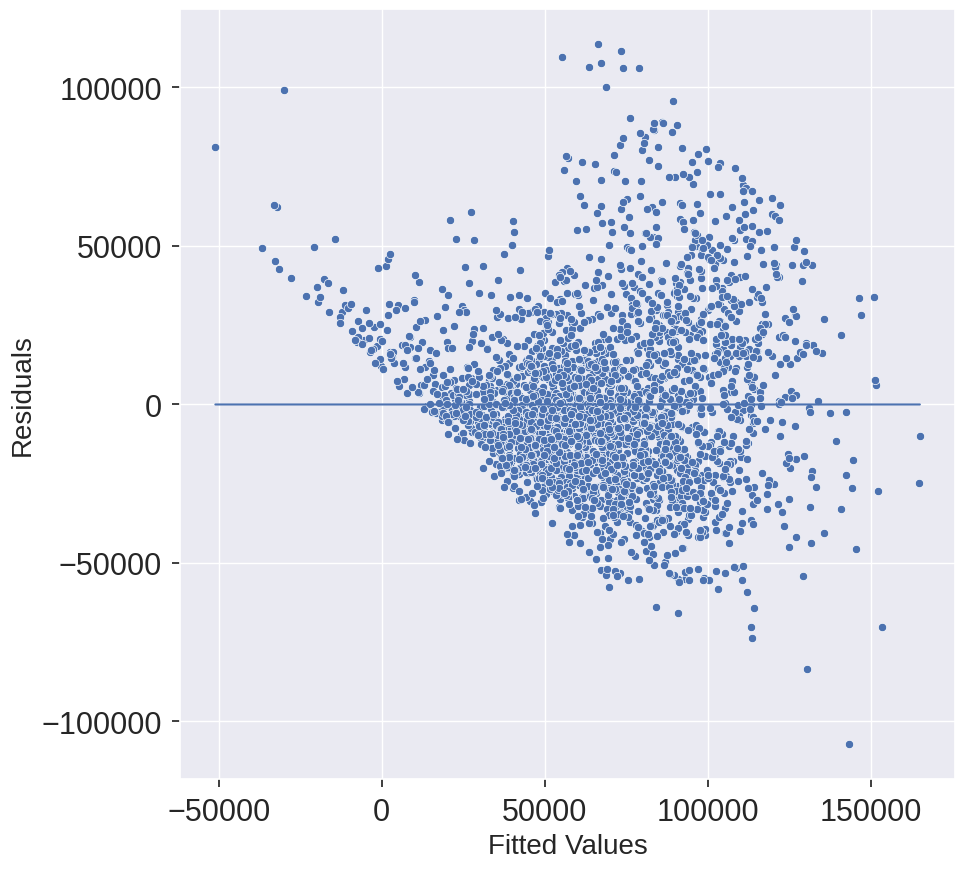

In [92]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
# Pass x and y as keyword arguments
sns.scatterplot(x=result.fittedvalues, y=result.resid)
sns.lineplot(x=result.fittedvalues, y=0)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)

- Normalitas kita anggap terpenuhi (Uji F dan Uji T valid)
- Rataan error = 0, kita anggap terpenuhi karena pada gambar nilai error cenderung merata dan mendeketi 0 (Nilai beta dan nilai prediksi tidak bias)
- Error tidak saling berkolerasi (Kita anggap R-square serta p-value uji T tidak bias
- Homoscedastisitas (ragam error homogen) ada indikasi tidak terpenuhi (Hasil prediksi ketika semakin besar nilainya tidak stabil) --> Solusi penggunaan model lainnya

**Check Corellation other variable**

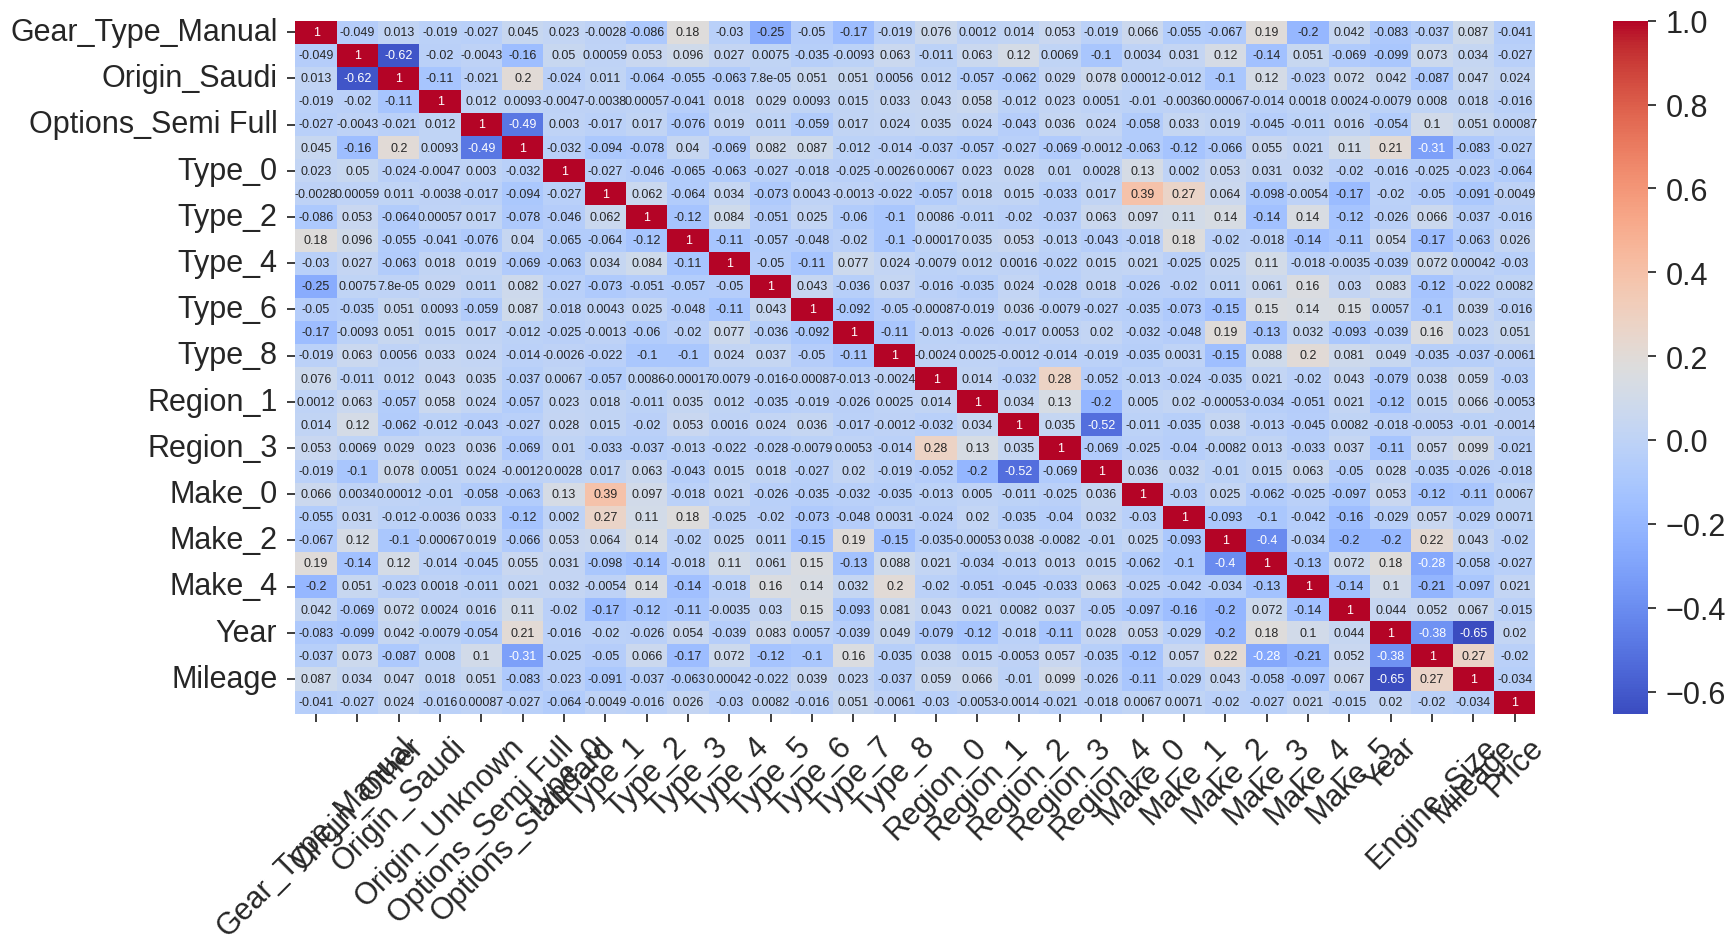

In [93]:
# calculate correlation using spearman
df_corr = df_preprocess.corr(method = "spearman")

# rules untuk membuat heatmap menjadi tidak kotak
mask = np.triu(np.ones_like(df_corr))

# membuat heatmap
plt.figure(figsize = (20,9))
sns.heatmap(df_corr, cmap="coolwarm", annot = True, annot_kws={'size':9})

plt.xticks(rotation = 45)
plt.show()

**Multicollinearity**

In [94]:
def calc_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df_feature.columns
    vif["VIF"] = [variance_inflation_factor(df_feature.values, i) for i in range(df_feature.shape[1])]

    return(vif)

In [95]:
calc_vif(df_feature)

,variables,VIF
0,Gear_Type_Manual,1.4
1,Origin_Other,1.9
2,Origin_Saudi,7.9
3,Origin_Unknown,1.0
4,Options_Semi Full,1.9
5,Options_Standard,2.6
6,Type_0,1.1
7,Type_1,1.6
8,Type_2,1.6
9,Type_3,2.2


- Multikolineritas ada indikasi tidak terpenuhi (Tidak valid dalam penginterprestasi nilai beta) --> Feature Selection

### **Conclusion**

Dalam proyek ini, kita berhasil membangun sebuah model untuk memprediksi harga mobil bekas dengan rentang harga antara 11.000 hingga 185.000 SAR. Model ini dapat menjadi informasi pendukung yang berguna dalam menentukan harga jual dan beli mobil bekas bagi perusahaan maupun individu yang melakukan transaksi.

Hasil dari model menunjukkan bahwa fitur-fitur yang paling signifikan pengaruhnya adalah Make, Engine Size, dan Year. Performa model regresi dievaluasi menggunakan MAE (Mean Absolute Error), dan MAPE (Mean Absolute Percentage Error). Setelah melalui proses penyetelan hyperparameter pada masing-masing metrik evaluasi, diperoleh nilai akhir sebesar 11.476,471234 untuk MAE, dan 0,193763 untuk MAPE.

Nilai RMSE memiliki makna bahwa ketika model digunakan untuk memprediksi harga mobil bekas, perkiraan harga rata-ratanya dapat memiliki selisih sekitar 17.532 SAR dari harga yang seharusnya. Namun, prediksi yang dihasilkan juga dapat melesat jauh dari nilai sebenarnya karena adanya bias pada model.

Model yang diperoleh masih memiliki potensi untuk ditingkatkan melalui proses-proses tertentu. Namun, untuk saat ini, kami berasumsi bahwa model sudah mencapai hasil yang diharapkan. Selain itu, dalam proses pembuatan model, pengetahuan yang mendalam mengenai mobil sangat diperlukan untuk mempermudah pengembangan model yang lebih baik.

### **Recommendation**

Berikut ini adalah beberapa rekomendasi yang dapat dilakukan untuk meningkatkan performa model:

1. Menambahkan fitur yang mengkategorikan jenis mobil menjadi classic atau non-classic. Hal ini penting karena harga mobil bekas terhadap mileage dan tahun pembuatan dapat berbeda secara signifikan antara mobil-mobil classic dan mobil-mobil biasa. Dengan memasukkan fitur ini ke dalam model, kemungkinan besar akan meningkatkan akurasi prediksi harga mobil bekas.

2. Melakukan analisis terhadap nilai error tertinggi yang dihasilkan oleh model, dengan mengelompokkan error menjadi 3 kategori, yaitu overestimation (5%), underestimation (5%), dan mayoritas yang memiliki error mendekati nilai mean (90%). Setelah itu, dilakukan pemeriksaan hubungan antara error tersebut dengan setiap variabel independen. Dengan demikian, dapat dilakukan proses training ulang dan menghindari variabel yang menyebabkan error tinggi.

3. Jika tersedia tambahan data yang signifikan, dapat mencoba menggunakan model yang lebih kompleks seperti recursive neural networks (RNN). Namun, perlu diperhatikan bahwa jika jumlah data dan fitur masih sebatas dataset yang ada saat ini, kemungkinan peningkatan performa model secara signifikan dengan menggunakan model yang lebih kompleks tidak terlalu besar.

#### **Save Model**

In [96]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_SaudiUsedCar_XGB.sav', 'wb'))